# 🔄 Bootstrap (Метод Монте-Карло)

---

## 🎯 Концепция метода

**Bootstrap** — это мощный компьютерно-интенсивный статистический метод, который позволяет оценивать распределение статистики путем многократного ресемплинга исходных данных.

### 🎪 Основная идея:
> *"Вытягивание себя за шнурки ботинок"* — использование только имеющихся данных для оценки неопределенности


# Философия bootstrap
"Если у нас есть одна выборка, мы можем создать множество её копий"
"и изучить, как статистики ведут себя на этих копиях"

BOOTSTRAP МЕТОД: ВИЗУАЛИЗАЦИЯ ПРОЦЕССА
Исходная выборка: 15 наблюдений
Выборочное среднее: 49.25
Выборочное стандартное отклонение: 10.63

Генерируем 10000 bootstrap-выборок...


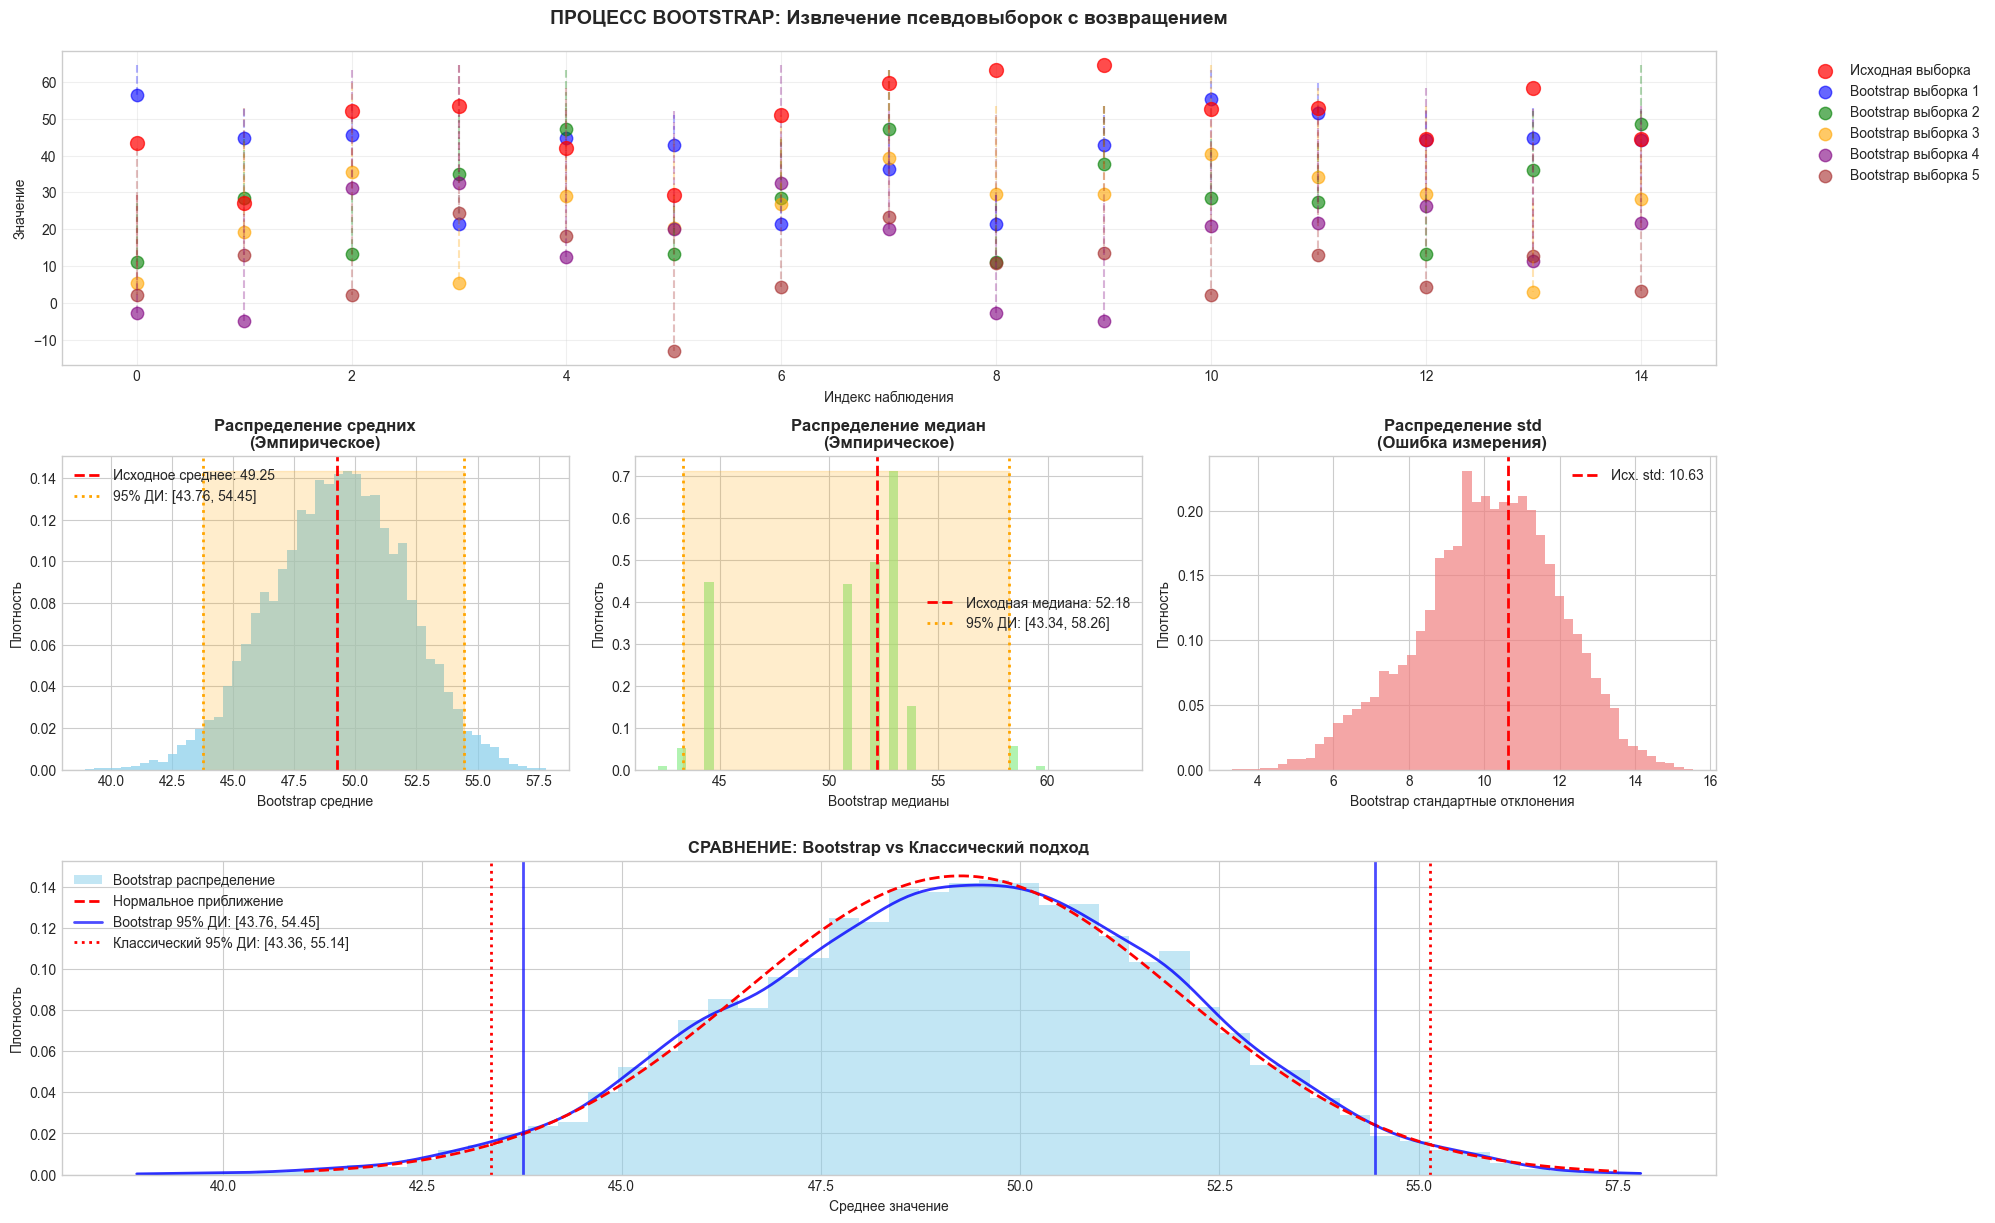


РЕЗУЛЬТАТЫ BOOTSTRAP АНАЛИЗА

ОСНОВНЫЕ СТАТИСТИКИ:
Исходное среднее: 49.2499
Bootstrap среднее: 49.2593
Смещение: 0.0093

СТАНДАРТНЫЕ ОШИБКИ:
Классическая SE: 2.7451
Bootstrap SE: 2.7516

ДОВЕРИТЕЛЬНЫЕ ИНТЕРВАЛЫ (95%):
Bootstrap ДИ: [43.7595, 54.4454]
Классический ДИ: [43.3622, 55.1377]
Ширина bootstrap ДИ: 10.6860
Ширина классического ДИ: 11.7755

ПРЕИМУЩЕСТВА BOOTSTRAP:
✓ Не требует предположений о распределении
✓ Работает с любыми статистиками (медиана, процентили и др.)
✓ Учитывает асимметрию и выбросы
✓ Особенно полезен для малых выборок


In [17]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import pandas as pd

# Настройка стиля
plt.style.use('seaborn-v0_8-whitegrid')
plt.rcParams['font.size'] = 10
sns.set_palette("husl")

np.random.seed(42)  # для воспроизводимости

def bootstrap_demo():
    print("=" * 70)
    print("BOOTSTRAP МЕТОД: ВИЗУАЛИЗАЦИЯ ПРОЦЕССА")
    print("=" * 70)
    
    # 1. Генерируем исходную малую выборку из смеси распределений
    # (имитируем реальные данные, которые не обязательно нормальны)
    n_original = 15
    true_mean = 50
    true_std = 12
    
    # Создаем смесь нормальных распределений для большей реалистичности
    sample1 = np.random.normal(true_mean - 5, true_std, n_original//3)
    sample2 = np.random.normal(true_mean + 5, true_std//2, n_original//3)
    sample3 = np.random.normal(true_mean, true_std, n_original - 2*(n_original//3))
    
    original_sample = np.concatenate([sample1, sample2, sample3])
    np.random.shuffle(original_sample)
    
    print(f"Исходная выборка: {n_original} наблюдений")
    print(f"Выборочное среднее: {np.mean(original_sample):.2f}")
    print(f"Выборочное стандартное отклонение: {np.std(original_sample):.2f}")
    
    # 2. Параметры bootstrap
    n_bootstrap = 10000
    bootstrap_means = []
    bootstrap_medians = []
    bootstrap_stds = []
    
    # 3. Процесс bootstrap
    print(f"\nГенерируем {n_bootstrap} bootstrap-выборок...")
    
    for i in range(n_bootstrap):
        # Извлекаем bootstrap-выборку с возвращением
        bootstrap_sample = np.random.choice(original_sample, size=len(original_sample), replace=True)
        
        # Вычисляем статистики
        bootstrap_means.append(np.mean(bootstrap_sample))
        bootstrap_medians.append(np.median(bootstrap_sample))
        bootstrap_stds.append(np.std(bootstrap_sample))

    # 4. Доверительные интервалы
    alpha = 0.05
    ci_mean_lower = np.percentile(bootstrap_means, alpha/2 * 100)
    ci_mean_upper = np.percentile(bootstrap_means, (1 - alpha/2) * 100)
    
    ci_median_lower = np.percentile(bootstrap_medians, alpha/2 * 100)
    ci_median_upper = np.percentile(bootstrap_medians, (1 - alpha/2) * 100)
    
    # 5. ВИЗУАЛИЗАЦИЯ
    fig = plt.figure(figsize=(20, 16))
    
    # Сетка для графиков
    gs = plt.GridSpec(4, 3, figure=fig)
    
    # График 1: Исходная выборка и процесс bootstrap
    ax1 = fig.add_subplot(gs[0, :])
    
    # Покажем первые несколько bootstrap-выборок
    n_demo_samples = 5
    demo_bootstrap_samples = []
    demo_indices = []
    
    for i in range(n_demo_samples):
        indices = np.random.choice(range(len(original_sample)), size=len(original_sample), replace=True)
        demo_indices.append(indices)
        demo_bootstrap_samples.append(original_sample[indices])
    
    
    # Визуализация исходной выборки
    positions = np.arange(len(original_sample))
    ax1.scatter(positions, original_sample, s=100, c='red', alpha=0.7, label='Исходная выборка', zorder=5)
    
    # Визуализация bootstrap-выборок
    colors = ['blue', 'green', 'orange', 'purple', 'brown']
    for i, (sample, indices, color) in enumerate(zip(demo_bootstrap_samples, demo_indices, colors)):
        y_offset = - (i+1) * 8  # смещение по вертикали
        ax1.scatter(positions, sample + y_offset, s=80, c=color, alpha=0.6, 
                   label=f'Bootstrap выборка {i+1}')
        
        # Соединяем точки с исходными значениями
        for j, idx in enumerate(indices):
            ax1.plot([positions[j], positions[j]], [original_sample[idx], sample[j] + y_offset], 
                    color=color, alpha=0.3, linestyle='--')
    
    ax1.set_xlabel('Индекс наблюдения')
    ax1.set_ylabel('Значение')
    ax1.set_title('ПРОЦЕСС BOOTSTRAP: Извлечение псевдовыборок с возвращением', 
                  fontsize=14, fontweight='bold', pad=20)
    ax1.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    ax1.grid(True, alpha=0.3)
    
    # График 2: Распределение bootstrap-средних
    ax2 = fig.add_subplot(gs[1, 0])
    n, bins, patches = ax2.hist(bootstrap_means, bins=50, density=True, alpha=0.7, color='skyblue')
    ax2.axvline(np.mean(original_sample), color='red', linestyle='--', linewidth=2, 
                label=f'Исходное среднее: {np.mean(original_sample):.2f}')
    ax2.axvline(ci_mean_lower, color='orange', linestyle=':', linewidth=2)
    ax2.axvline(ci_mean_upper, color='orange', linestyle=':', linewidth=2, 
                label=f'95% ДИ: [{ci_mean_lower:.2f}, {ci_mean_upper:.2f}]')
    ax2.fill_betweenx([0, max(n)], ci_mean_lower, ci_mean_upper, alpha=0.2, color='orange')
    ax2.set_xlabel('Bootstrap средние')
    ax2.set_ylabel('Плотность')
    ax2.set_title('Распределение средних\n(Эмпирическое)', fontweight='bold')
    ax2.legend()
    
    # График 3: Распределение bootstrap-медиан
    ax3 = fig.add_subplot(gs[1, 1])
    n, bins, patches = ax3.hist(bootstrap_medians, bins=50, density=True, alpha=0.7, color='lightgreen')
    ax3.axvline(np.median(original_sample), color='red', linestyle='--', linewidth=2, 
                label=f'Исходная медиана: {np.median(original_sample):.2f}')
    ax3.axvline(ci_median_lower, color='orange', linestyle=':', linewidth=2)
    ax3.axvline(ci_median_upper, color='orange', linestyle=':', linewidth=2, 
                label=f'95% ДИ: [{ci_median_lower:.2f}, {ci_median_upper:.2f}]')
    ax3.fill_betweenx([0, max(n)], ci_median_lower, ci_median_upper, alpha=0.2, color='orange')
    ax3.set_xlabel('Bootstrap медианы')
    ax3.set_ylabel('Плотность')
    ax3.set_title('Распределение медиан\n(Эмпирическое)', fontweight='bold')
    ax3.legend()
    
    # График 4: Распределение bootstrap-стандартных отклонений
    ax4 = fig.add_subplot(gs[1, 2])
    n, bins, patches = ax4.hist(bootstrap_stds, bins=50, density=True, alpha=0.7, color='lightcoral')
    ax4.axvline(np.std(original_sample), color='red', linestyle='--', linewidth=2, 
                label=f'Исх. std: {np.std(original_sample):.2f}')
    ax4.set_xlabel('Bootstrap стандартные отклонения')
    ax4.set_ylabel('Плотность')
    ax4.set_title('Распределение std\n(Ошибка измерения)', fontweight='bold')
    ax4.legend()
    
    # График 5: Сравнение с нормальным приближением
    ax5 = fig.add_subplot(gs[2, :])
    
    # Bootstrap распределение
    bootstrap_kde = stats.gaussian_kde(bootstrap_means)
    x_range = np.linspace(min(bootstrap_means), max(bootstrap_means), 200)
    
    ax5.hist(bootstrap_means, bins=50, density=True, alpha=0.5, color='skyblue', 
             label='Bootstrap распределение')
    ax5.plot(x_range, bootstrap_kde(x_range), 'b-', linewidth=2, alpha=0.8)
    
    # Нормальное приближение (классическая формула)
    classical_se = np.std(original_sample) / np.sqrt(len(original_sample))
    classical_x = np.linspace(np.mean(original_sample) - 3*classical_se, 
                             np.mean(original_sample) + 3*classical_se, 200)
    classical_y = stats.norm.pdf(classical_x, np.mean(original_sample), classical_se)
    
    ax5.plot(classical_x, classical_y, 'r--', linewidth=2, label='Нормальное приближение')
    
    # Bootstrap ДИ
    ax5.axvline(ci_mean_lower, color='blue', linestyle='-', linewidth=2, alpha=0.7)
    ax5.axvline(ci_mean_upper, color='blue', linestyle='-', linewidth=2, alpha=0.7, 
                label=f'Bootstrap 95% ДИ: [{ci_mean_lower:.2f}, {ci_mean_upper:.2f}]')
    
    # Классический ДИ (t-распределение)
    t_critical = stats.t.ppf(0.975, len(original_sample)-1)
    classical_ci_lower = np.mean(original_sample) - t_critical * classical_se
    classical_ci_upper = np.mean(original_sample) + t_critical * classical_se
    
    ax5.axvline(classical_ci_lower, color='red', linestyle=':', linewidth=2)
    ax5.axvline(classical_ci_upper, color='red', linestyle=':', linewidth=2, 
                label=f'Классический 95% ДИ: [{classical_ci_lower:.2f}, {classical_ci_upper:.2f}]')
    
    ax5.set_xlabel('Среднее значение')
    ax5.set_ylabel('Плотность')
    ax5.set_title('СРАВНЕНИЕ: Bootstrap vs Классический подход', fontweight='bold')
    ax5.legend()
    
    
    plt.tight_layout()
    plt.show()
    
    # ВЫВОДЫ И СТАТИСТИКИ
    print("\n" + "=" * 70)
    print("РЕЗУЛЬТАТЫ BOOTSTRAP АНАЛИЗА")
    print("=" * 70)
    
    print(f"\nОСНОВНЫЕ СТАТИСТИКИ:")
    print(f"Исходное среднее: {np.mean(original_sample):.4f}")
    print(f"Bootstrap среднее: {np.mean(bootstrap_means):.4f}")
    print(f"Смещение: {np.mean(bootstrap_means) - np.mean(original_sample):.4f}")
    
    print(f"\nСТАНДАРТНЫЕ ОШИБКИ:")
    print(f"Классическая SE: {classical_se:.4f}")
    print(f"Bootstrap SE: {np.std(bootstrap_means):.4f}")
    
    print(f"\nДОВЕРИТЕЛЬНЫЕ ИНТЕРВАЛЫ (95%):")
    print(f"Bootstrap ДИ: [{ci_mean_lower:.4f}, {ci_mean_upper:.4f}]")
    print(f"Классический ДИ: [{classical_ci_lower:.4f}, {classical_ci_upper:.4f}]")
    print(f"Ширина bootstrap ДИ: {ci_mean_upper - ci_mean_lower:.4f}")
    print(f"Ширина классического ДИ: {classical_ci_upper - classical_ci_lower:.4f}")
    
    print(f"\nПРЕИМУЩЕСТВА BOOTSTRAP:")
    print("✓ Не требует предположений о распределении")
    print("✓ Работает с любыми статистиками (медиана, процентили и др.)")
    print("✓ Учитывает асимметрию и выбросы")
    print("✓ Особенно полезен для малых выборок")

# Запуск демонстрации
bootstrap_demo()




BOOTSTRAP ДЛЯ НЕЛИНЕЙНОЙ СТАТИСТИКИ: КОЭФФИЦИЕНТ ВАРИАЦИИ


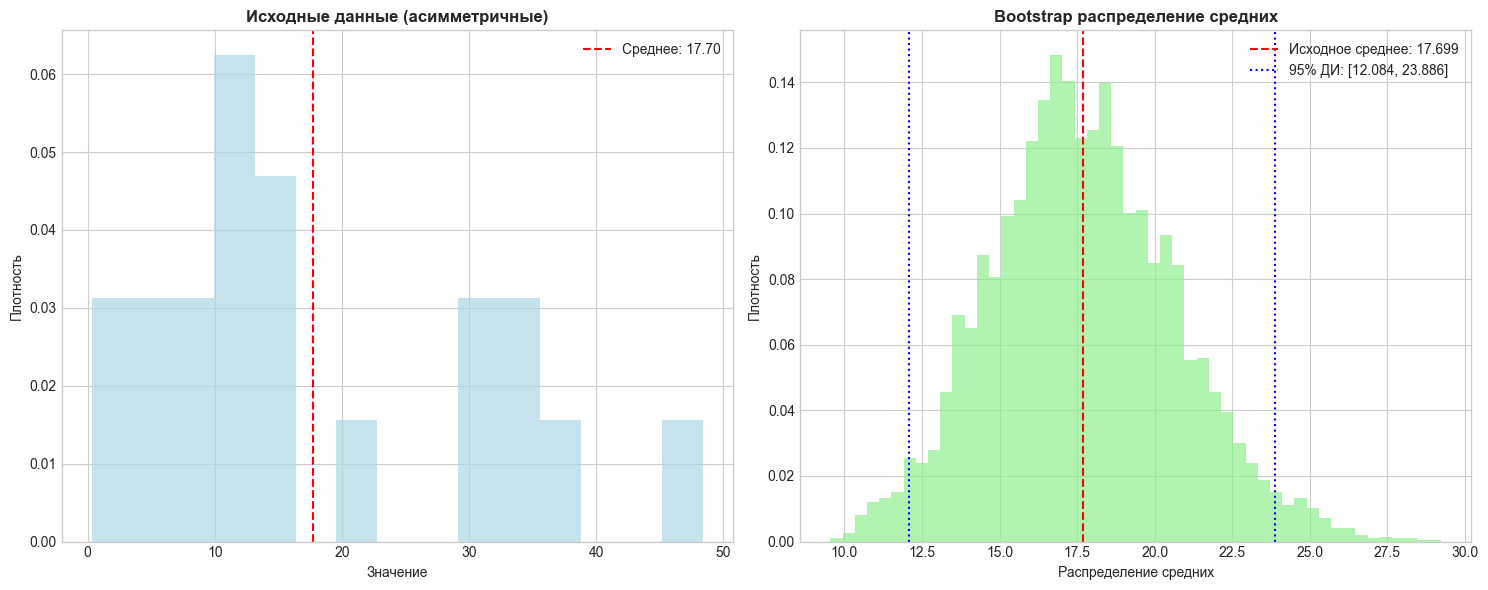

Коэффициент вариации исходных данных: 0.7441
Bootstrap 95% ДИ для среднего: [12.0838, 23.8860]


In [23]:
# ДОПОЛНИТЕЛЬНАЯ ДЕМОНСТРАЦИЯ: Bootstrap для нелинейной статистики
def bootstrap_nonlinear_demo():
    print("\n" + "=" * 70)
    print("BOOTSTRAP ДЛЯ НЕЛИНЕЙНОЙ СТАТИСТИКИ: КОЭФФИЦИЕНТ ВАРИАЦИИ")
    print("=" * 70)
    
    # Генерируем данные с положительной асимметрией
    np.random.seed(123)
    data = np.random.gamma(shape=2, scale=10, size=20)
    
    # Функция для коэффициента вариации
    def coefficient_of_variation(x):
        return np.std(x) / np.mean(x)
    # Функция для среднего
    def boot_mean(x):
        return np.mean(x)
    
    # Bootstrap для коэффициента вариации  и средних 
    n_boot = 5000
    boot_cv = []
    boot_means = []
    
    for _ in range(n_boot):
        boot_sample = np.random.choice(data, size=len(data), replace=True)
        boot_cv.append(coefficient_of_variation(boot_sample))
        boot_means.append(boot_mean(boot_sample))
  
    # Визуализация
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))
    
    # Исходные данные
    ax1.hist(data, bins=15, alpha=0.7, color='lightblue', density=True)
    ax1.axvline(np.mean(data), color='red', linestyle='--', label=f'Среднее: {np.mean(data):.2f}')
    ax1.set_xlabel('Значение')
    ax1.set_ylabel('Плотность')
    ax1.set_title('Исходные данные (асимметричные)', fontweight='bold')
    ax1.legend()
    
    # Bootstrap распределение коэффициента вариации
    ax2.hist(boot_means, bins=50, alpha=0.7, color='lightgreen', density=True)
    ax2.axvline(boot_mean(data), color='red', linestyle='--', 
                label=f'Исходное среднее: {boot_mean(data):.3f}')
    
    # Доверительный интервал
    ci_lower = np.percentile(boot_means, 2.5)
    ci_upper = np.percentile(boot_means, 97.5)
    ax2.axvline(ci_lower, color='blue', linestyle=':', label=f'95% ДИ: [{ci_lower:.3f}, {ci_upper:.3f}]')
    ax2.axvline(ci_upper, color='blue', linestyle=':')
    
    ax2.set_xlabel('Распределение средних')
    ax2.set_ylabel('Плотность')
    ax2.set_title('Bootstrap распределение средних', fontweight='bold')
    ax2.legend()
    '''
    # Исходные данные
    ax1.hist(data, bins=15, alpha=0.7, color='lightblue', density=True)
    ax1.axvline(np.mean(data), color='red', linestyle='--', label=f'Среднее: {np.mean(data):.2f}')
    ax1.set_xlabel('Значение')
    ax1.set_ylabel('Плотность')
    ax1.set_title('Исходные данные (асимметричные)', fontweight='bold')
    ax1.legend()
    
    # Bootstrap распределение коэффициента вариации
    ax2.hist(boot_cv, bins=50, alpha=0.7, color='lightgreen', density=True)
    ax2.axvline(coefficient_of_variation(data), color='red', linestyle='--', 
                label=f'Исходный CV: {coefficient_of_variation(data):.3f}')
    
    # Доверительный интервал
    ci_lower = np.percentile(boot_cv, 2.5)
    ci_upper = np.percentile(boot_cv, 97.5)
    ax2.axvline(ci_lower, color='blue', linestyle=':', label=f'95% ДИ: [{ci_lower:.3f}, {ci_upper:.3f}]')
    ax2.axvline(ci_upper, color='blue', linestyle=':')
    
    ax2.set_xlabel('Коэффициент вариации')
    ax2.set_ylabel('Плотность')
    ax2.set_title('Bootstrap распределение коэффициента вариации', fontweight='bold')
    ax2.legend()
    '''
    plt.tight_layout()
    plt.show()
    
    print(f"Коэффициент вариации исходных данных: {coefficient_of_variation(data):.4f}")
    print(f"Bootstrap 95% ДИ для среднего: [{ci_lower:.4f}, {ci_upper:.4f}]")

# Запуск дополнительной демонстрации
bootstrap_nonlinear_demo()